## Random Forest - Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (9,5)
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
df=pd.read_csv("car_dataset.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.350,5.590,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.750,9.540,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.250,9.850,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.850,4.150,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.600,6.870,42450,Diesel,Dealer,Manual,0


In [3]:
df.shape

(301, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
df.isnull().any()

Car_Name         False
Year             False
Selling_Price    False
Present_Price    False
Kms_Driven       False
Fuel_Type        False
Seller_Type      False
Transmission     False
Owner            False
dtype: bool

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,301.000,2013.628,2.892,2003.000,2012.000,2014.000,2016.000,2018.000
Selling_Price,301.000,4.661,5.083,0.100,0.900,3.600,6.000,35.000
Present_Price,301.000,7.628,8.644,0.320,1.200,6.400,9.900,92.600
Kms_Driven,301.000,36947.206,38886.884,500.000,15000.000,32000.000,48767.000,500000.000
Owner,301.000,0.043,0.248,0.000,0.000,0.000,0.000,3.000


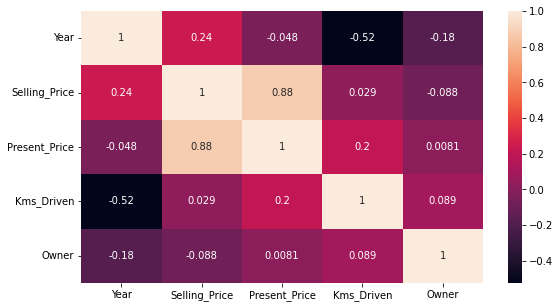

In [7]:
sns.heatmap(df.corr(), annot=True)
plt.show()

In [8]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.350,5.590,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.750,9.540,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.250,9.850,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.850,4.150,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.600,6.870,42450,Diesel,Dealer,Manual,0


In [9]:
df["vehicle_age"]=2021-df.Year

In [10]:
df.Car_Name.value_counts()
# çok fazla unique değer indeks gibi davranacağından düşürülebilir, burada encoder ile skorlar denenecek

city                         26
corolla altis                16
verna                        14
fortuner                     11
brio                         10
ciaz                          9
innova                        9
i20                           9
grand i10                     8
jazz                          7
amaze                         7
Royal Enfield Classic 350     7
ertiga                        6
eon                           6
sx4                           6
alto k10                      5
i10                           5
swift                         5
Bajaj Pulsar 150              4
Royal Enfield Thunder 350     4
ritz                          4
wagon r                       4
etios liva                    4
dzire                         4
xcent                         3
etios cross                   3
Royal Enfield Thunder 500     3
TVS Apache RTR 160            3
Yamaha FZ S V 2.0             3
creta                         3
Honda CB Hornet 160R          3
etios g 

In [11]:
df.drop(columns=["Year"], inplace=True)

In [12]:
df.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,vehicle_age
0,ritz,3.350,5.590,27000,Petrol,Dealer,Manual,0,7
1,sx4,4.750,9.540,43000,Diesel,Dealer,Manual,0,8
2,ciaz,7.250,9.850,6900,Petrol,Dealer,Manual,0,4
3,wagon r,2.850,4.150,5200,Petrol,Dealer,Manual,0,10
4,swift,4.600,6.870,42450,Diesel,Dealer,Manual,0,7


## Train test split

In [13]:
from sklearn.preprocessing import OrdinalEncoder

In [14]:
X=df.drop("Selling_Price", axis=1)
y=df.Selling_Price

In [15]:
cat = X.select_dtypes("object").columns
cat

Index(['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object')

In [16]:
X[cat].head()

,Car_Name,Fuel_Type,Seller_Type,Transmission
0,ritz,Petrol,Dealer,Manual
1,sx4,Diesel,Dealer,Manual
2,ciaz,Petrol,Dealer,Manual
3,wagon r,Petrol,Dealer,Manual
4,swift,Diesel,Dealer,Manual


In [17]:
enc = OrdinalEncoder()
X[cat] = enc.fit_transform(X[cat])
X.head()

,Car_Name,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,vehicle_age
0,90.000,5.590,27000,2.000,0.000,1.000,0,7
1,93.000,9.540,43000,1.000,0.000,1.000,0,8
2,68.000,9.850,6900,2.000,0.000,1.000,0,4
3,96.000,4.150,5200,2.000,0.000,1.000,0,10
4,92.000,6.870,42450,1.000,0.000,1.000,0,7


In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=5)

print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (240, 8)
Train target shape   :  (240,)
Test features shape  :  (61, 8)
Test target shape    :  (61,)


## Modeling for Decision Tree

In [19]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

In [20]:
DT_model = DecisionTreeRegressor(random_state=101)

In [21]:
DT_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=101)

In [22]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [23]:
def train_val(model, X_train, y_train, X_test, y_test):
    
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    
    scores = {"train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    "test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [24]:
train_val(DT_model, X_train, y_train, X_test, y_test)

,train,test
R2,1.000,0.952
mae,0.000,0.603
mse,0.000,1.283
rmse,0.000,1.133


In [25]:
from sklearn.model_selection import cross_validate, cross_val_score
model = DecisionTreeRegressor(random_state=101)
scores = cross_validate(model, X_train, y_train, scoring=['r2', 
                'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=10)
df_scores = pd.DataFrame(scores)

scoring, minv, maxv, mean = 'scoring', 'min', 'max', 'mean'
print('Cross-Validation Results\n')
print(f'{scoring:<35}|{minv:^15}|{maxv:^15}|{mean:^15}')
print(f'{"":-^35}|{"":-^15}|{"":-^15}|{"":-^15}')
for i in df_scores.columns[2:]:
    print(f'{i:<35}|{df_scores[i].min():^15.3f}|{df_scores[i].max():^15.3f}|{df_scores[i].mean():^15.3f}')
print('')

Cross-Validation Results

scoring                            |      min      |      max      |     mean      
-----------------------------------|---------------|---------------|---------------
test_r2                            |     0.660     |     0.972     |     0.891     
test_neg_mean_absolute_error       |    -1.406     |    -0.513     |    -0.787     
test_neg_mean_squared_error        |    -11.450    |    -0.673     |    -2.748     
test_neg_root_mean_squared_error   |    -3.384     |    -0.820     |    -1.457     



## Feature Importances

In [26]:
DT_model.feature_importances_

array([9.18365194e-03, 8.94444598e-01, 4.78756069e-03, 7.75109283e-04,
       2.82862694e-04, 7.56380773e-04, 3.41291861e-05, 8.97357073e-02])

In [27]:
df_f_i = pd.DataFrame(index=X.columns, data = DT_model.feature_importances_, 
                      columns = ["Feature Importance"]).sort_values("Feature Importance")
df_f_i

,Feature Importance
Owner,0.000
Seller_Type,0.000
Transmission,0.001
Fuel_Type,0.001
Kms_Driven,0.005
Car_Name,0.009
vehicle_age,0.090
Present_Price,0.894


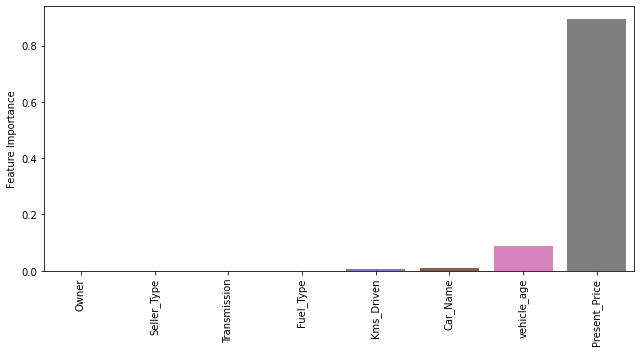

In [28]:
sns.barplot(x = df_f_i.index, y = 'Feature Importance', data = df_f_i)
plt.xticks(rotation = 90)
plt.tight_layout()

## Modeling for Random Forest

In [29]:
from sklearn.ensemble import RandomForestRegressor

In [30]:
rf_model = RandomForestRegressor(random_state=101)
rf_model.fit(X_train,y_train)
train_val(rf_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.986,0.973
mae,0.235,0.513
mse,0.348,0.725
rmse,0.590,0.851


In [31]:
from sklearn.model_selection import cross_validate, cross_val_score
model = RandomForestRegressor(random_state=101)
scores = cross_validate(model, X_train, y_train, scoring=['r2', 
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv =10)
df_scores = pd.DataFrame(scores)

scoring, minv, maxv, mean = 'scoring', 'min', 'max', 'mean'
print('Cross-Validation Results\n')
print(f'{scoring:<35}|{minv:^15}|{maxv:^15}|{mean:^15}')
print(f'{"":-^35}|{"":-^15}|{"":-^15}|{"":-^15}')
for i in df_scores.columns[2:]:
    print(f'{i:<35}|{df_scores[i].min():^15.3f}|{df_scores[i].max():^15.3f}|{df_scores[i].mean():^15.3f}')
print('')

# overfitting var (düzeltememesinin sebebi dataset'in küçük olması)

Cross-Validation Results

scoring                            |      min      |      max      |     mean      
-----------------------------------|---------------|---------------|---------------
test_r2                            |     0.390     |     0.970     |     0.862     
test_neg_mean_absolute_error       |    -1.202     |    -0.367     |    -0.736     
test_neg_mean_squared_error        |    -11.551    |    -0.344     |    -3.393     
test_neg_root_mean_squared_error   |    -3.399     |    -0.586     |    -1.566     



## Feature Importances

In [32]:
rf_model.feature_importances_

array([2.34156850e-02, 8.66318271e-01, 1.73148579e-02, 2.14160300e-03,
       2.08393371e-03, 2.67174857e-03, 6.16411815e-05, 8.59922594e-02])

In [33]:
df_f_i = pd.DataFrame(index=X.columns, data = rf_model.feature_importances_, 
                      columns = ["Feature Importance"]).sort_values("Feature Importance")
df_f_i

,Feature Importance
Owner,0.000
Seller_Type,0.002
Fuel_Type,0.002
Transmission,0.003
Kms_Driven,0.017
Car_Name,0.023
vehicle_age,0.086
Present_Price,0.866


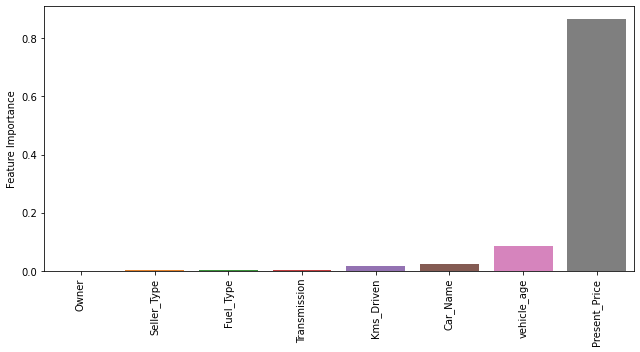

In [34]:
sns.barplot(x = df_f_i.index, y = 'Feature Importance', data = df_f_i)
plt.xticks(rotation = 90)
plt.tight_layout()

## Visualizing trees

In [35]:
from sklearn.tree import plot_tree

def report_model(model):
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    print('\n')
    print(train_val(model, X_train, y_train, X_test, y_test))
    print('\n')
    plt.figure(figsize=(12,8),dpi=100)
    plot_tree(model.estimators_[0], filled=True, feature_names=X.columns, fontsize=10);

In [ ]:
# max_features default değeri classification için 'auto (sqrt(n_features))' idi ama regresyon için 'auto (n_features)'
# bu sebeple model.estimators_[] değerinden diğer ağaçları da kontrol ettiğimizde genelde hep aynı feature ile
# başladığını görebiliriz; bu nedenle regresyon için gridsearch yapılırken özellikle de overfitting durumunda 
# manuel olarak max_features parametresine müdahale edip farklı değerler denememiz gerekir (n_features/3'ü mutlaka dene)

In [36]:
pruned_tree = RandomForestRegressor(n_estimators=250, max_depth=4, random_state=101)
pruned_tree.fit(X_train,y_train)

RandomForestRegressor(max_depth=4, n_estimators=250, random_state=101)



      train  test
R2    0.963 0.941
mae   0.572 0.750
mse   0.953 1.577
rmse  0.976 1.256




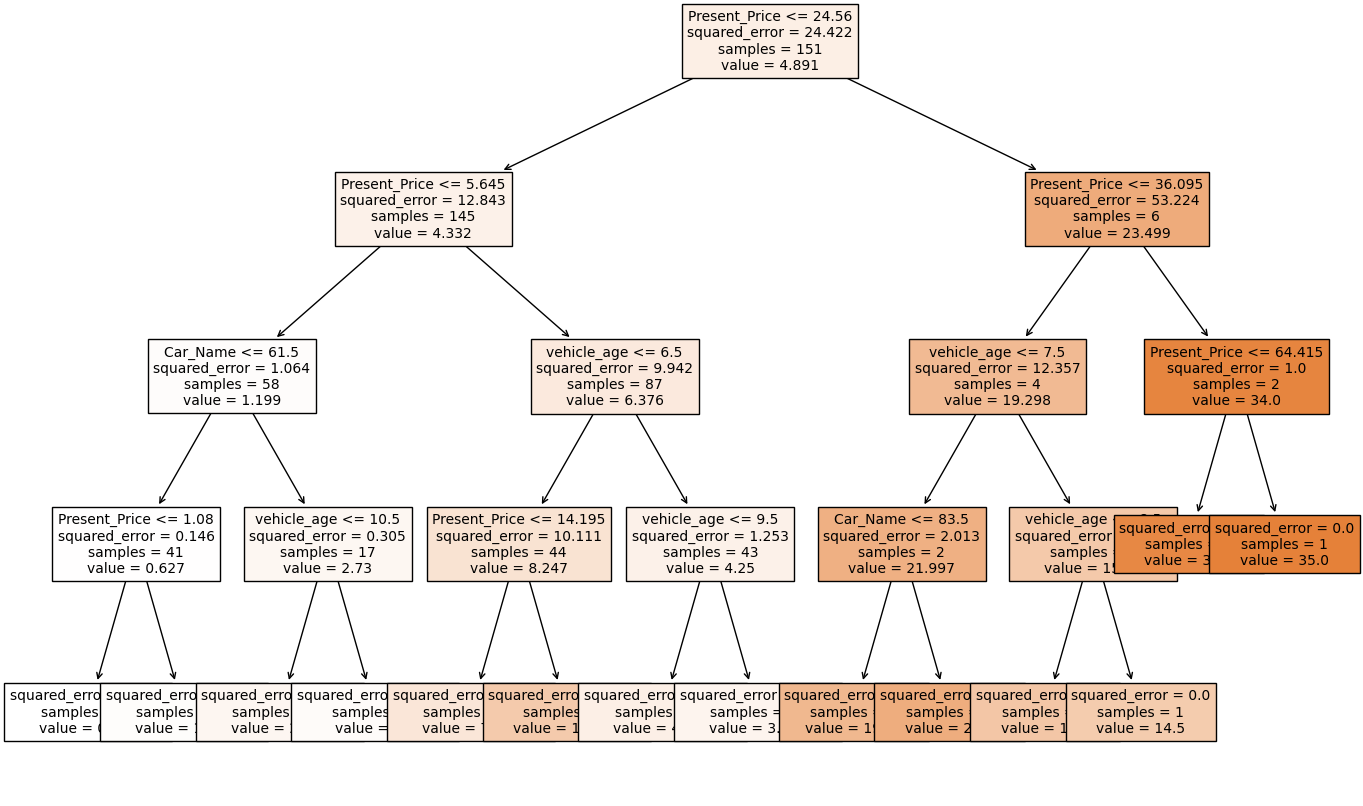

In [37]:
report_model(pruned_tree)

## GridSearch

In [38]:
from sklearn.model_selection import GridSearchCV

In [39]:
model = RandomForestRegressor(random_state=101)

In [40]:
param_grid = {"n_estimators":[64, 128, 200, 500],
              "max_depth": [None, 4, 5, 6, 7, 8],
              "min_samples_leaf": [1, 2, 3, 4],
              "min_samples_split": [2, 3, 5, 6],
              "max_features":['auto', len(df.columns)/3, 2, 4]}

In [41]:
grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=5,
                          n_jobs = -1)

In [42]:
grid_model.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=101), n_jobs=-1,
             param_grid={'max_depth': [None, 4, 5, 6, 7, 8],
                         'max_features': ['auto', 3.0, 2, 4],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 3, 5, 6],
                         'n_estimators': [64, 128, 200, 500]},
             scoring='neg_root_mean_squared_error')

In [43]:
grid_model.best_estimator_

RandomForestRegressor(max_depth=7, n_estimators=200, random_state=101)

In [44]:
grid_model.best_params_

{'max_depth': 7,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [45]:
grid_score =pd.DataFrame(grid_model.cv_results_)
grid_score[:30]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.244,0.003,0.017,0.004,None,auto,1,2,64,"{'max_depth': None, 'max_features': 'auto', 'm...",-0.701,-1.629,-1.491,-2.330,-2.248,-1.680,0.590,144
1,0.477,0.014,0.034,0.004,None,auto,1,2,128,"{'max_depth': None, 'max_features': 'auto', 'm...",-0.691,-1.473,-1.373,-2.300,-2.282,-1.624,0.608,10
2,0.753,0.037,0.048,0.004,None,auto,1,2,200,"{'max_depth': None, 'max_features': 'auto', 'm...",-0.691,-1.457,-1.296,-2.286,-2.305,-1.607,0.617,2
3,1.834,0.020,0.111,0.006,None,auto,1,2,500,"{'max_depth': None, 'max_features': 'auto', 'm...",-0.653,-1.477,-1.377,-2.352,-2.256,-1.623,0.625,9
4,0.231,0.006,0.019,0.003,None,auto,1,3,64,"{'max_depth': None, 'max_features': 'auto', 'm...",-0.705,-1.862,-1.475,-2.469,-2.256,-1.753,0.625,469
5,0.459,0.010,0.032,0.003,None,auto,1,3,128,"{'max_depth': None, 'max_features': 'auto', 'm...",-0.677,-1.646,-1.342,-2.374,-2.269,-1.662,0.624,39
6,0.704,0.007,0.045,0.005,None,auto,1,3,200,"{'max_depth': None, 'max_features': 'auto', 'm...",-0.683,-1.644,-1.326,-2.355,-2.272,-1.656,0.620,33
7,1.756,0.020,0.109,0.011,None,auto,1,3,500,"{'max_depth': None, 'max_features': 'auto', 'm...",-0.652,-1.607,-1.409,-2.355,-2.210,-1.647,0.611,26
8,0.223,0.004,0.017,0.004,None,auto,1,5,64,"{'max_depth': None, 'max_features': 'auto', 'm...",-0.704,-2.368,-1.232,-2.560,-2.136,-1.800,0.712,626
9,0.434,0.005,0.029,0.003,None,auto,1,5,128,"{'max_depth': None, 'max_features': 'auto', 'm...",-0.698,-2.140,-1.140,-2.489,-2.133,-1.720,0.681,332


In [46]:
grid_model.best_index_

1026

In [47]:
grid_model.best_score_

-1.6037357085528825

In [48]:
train_val(grid_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.986,0.972
mae,0.290,0.525
mse,0.368,0.758
rmse,0.607,0.870


In [49]:
# gridsearch yaptıktan sonra cross-validation yapmaya gerek yok, burada sonuçları görmek adına yapıldı

from sklearn.model_selection import cross_validate, cross_val_score

model = RandomForestRegressor(random_state=101, max_depth = None,
             max_features= 4,
             min_samples_leaf = 1,
             min_samples_split= 2,
             n_estimators= 200)
scores = cross_validate(model, X_train, y_train, scoring=['r2', 
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv = 10)
df_scores = pd.DataFrame(scores)
df_scores.mean()[2:]

test_r2                             0.894
test_neg_mean_absolute_error       -0.719
test_neg_mean_squared_error        -3.129
test_neg_root_mean_squared_error   -1.454
dtype: float64

In [50]:
y_pred = grid_model.predict(X_test)
my_dict = { 'Actual': y_test, 'Pred': y_pred, 'Residual': y_test-y_pred }
compare = pd.DataFrame(my_dict)

In [51]:
comp_sample = compare.sample(20)
comp_sample

,Actual,Pred,Residual
163,0.450,0.473,-0.023
181,0.300,0.360,-0.060
216,2.900,3.045,-0.145
84,3.490,3.597,-0.107
191,0.200,0.280,-0.080
61,4.500,5.250,-0.750
56,4.500,4.584,-0.084
132,0.750,0.788,-0.038
43,5.500,5.548,-0.048
268,4.800,5.231,-0.431


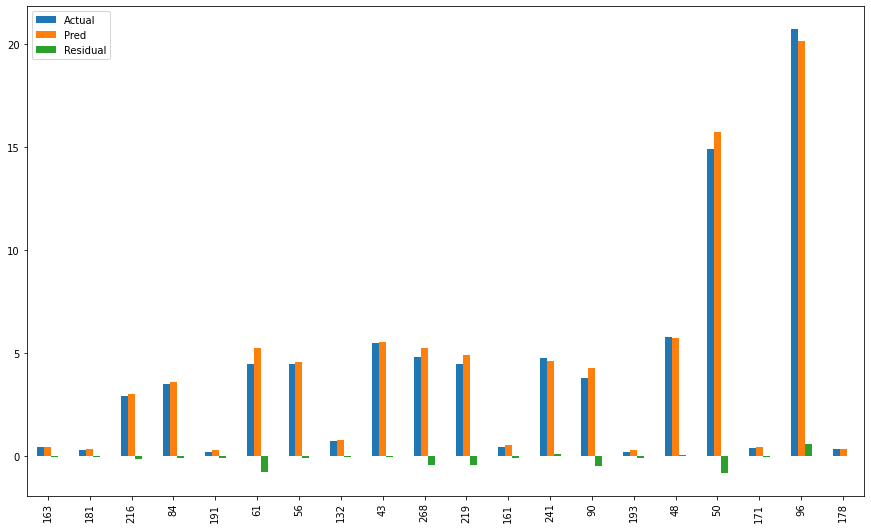

In [52]:
comp_sample.plot(kind='bar',figsize=(15,9))
plt.show()